## Random Forest

In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

##### Use the Glass dataset and apply the Random forest model.


In [332]:
df = pd.read_excel('glass.xlsx')

#### 1. Exploratory Data Analysis (EDA):

Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, inconsistencies in the data.


In [333]:
df.describe()

,Prepare a model for glass classification using Random Forest
count,18
unique,18
top,Data Description:
freq,1


In [334]:
df.isnull().sum()

Prepare a model for glass classification using Random Forest    1
dtype: int64

In [335]:
df.duplicated().sum()

np.int64(0)

In [336]:
df = df.dropna().reset_index(drop=True)


In [337]:
df_features = df[df.iloc[:,0].str.contains(":", na=False)].copy()
df_features[['Feature', 'Description']] = df_features.iloc[:,0].str.split(':', n=1, expand=True)


In [338]:
df_features['Feature'] = df_features['Feature'].str.strip()
df_features['Description'] = df_features['Description'].str.strip()


In [339]:
df_types = df[df.iloc[:,0].str.contains("--", na=False)].copy()
df_types[['Type', 'Type of glass']] = df_types.iloc[:,0].str.split('--', n=1, expand=True)

In [340]:
df_types['Type'] = df_types['Type'].str.strip()
df_types['Type of glass'] = df_types['Type of glass'].str.strip()

In [341]:
df_features = df_features.drop(columns=[df_features.columns[0]])
df_types = df_types.drop(columns=[df_types.columns[0]])
df_types

,Type,Type of glass
11,1,building_windows_float_processed
12,2,building_windows_non_float_processed
13,3,vehicle_windows_float_processed
14,4,vehicle_windows_non_float_processed (none in t...
15,5,containers
16,6,tableware
17,7,headlamps


In [342]:
df_features=df_features.iloc[1:11].reset_index(drop=True)
df_types=df_types.reset_index(drop=True)


In [343]:
columns=df_features['Feature'].values.tolist()
columns

['RI', 'Na', 'Mg', 'AI', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

In [345]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
df1 = pd.read_csv(url, names=columns, index_col=0)
df1

,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe,Type
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


#### 2: Data Visualization:

Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.

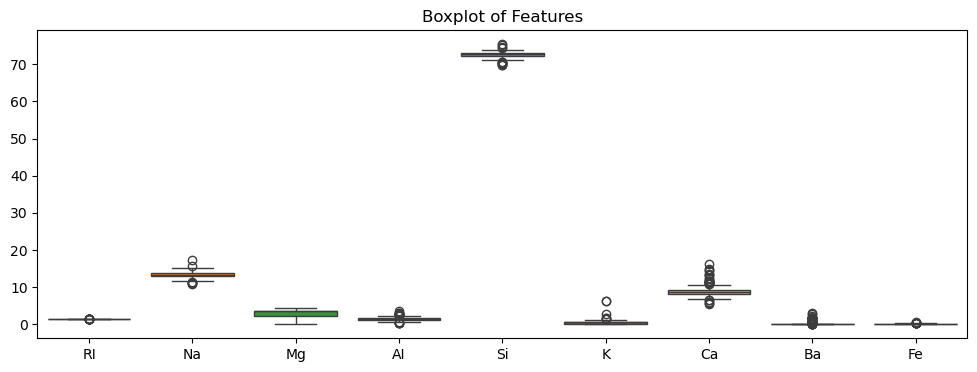

In [349]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df1.drop('Type', axis=1))
plt.title('Boxplot of Features')
plt.show()

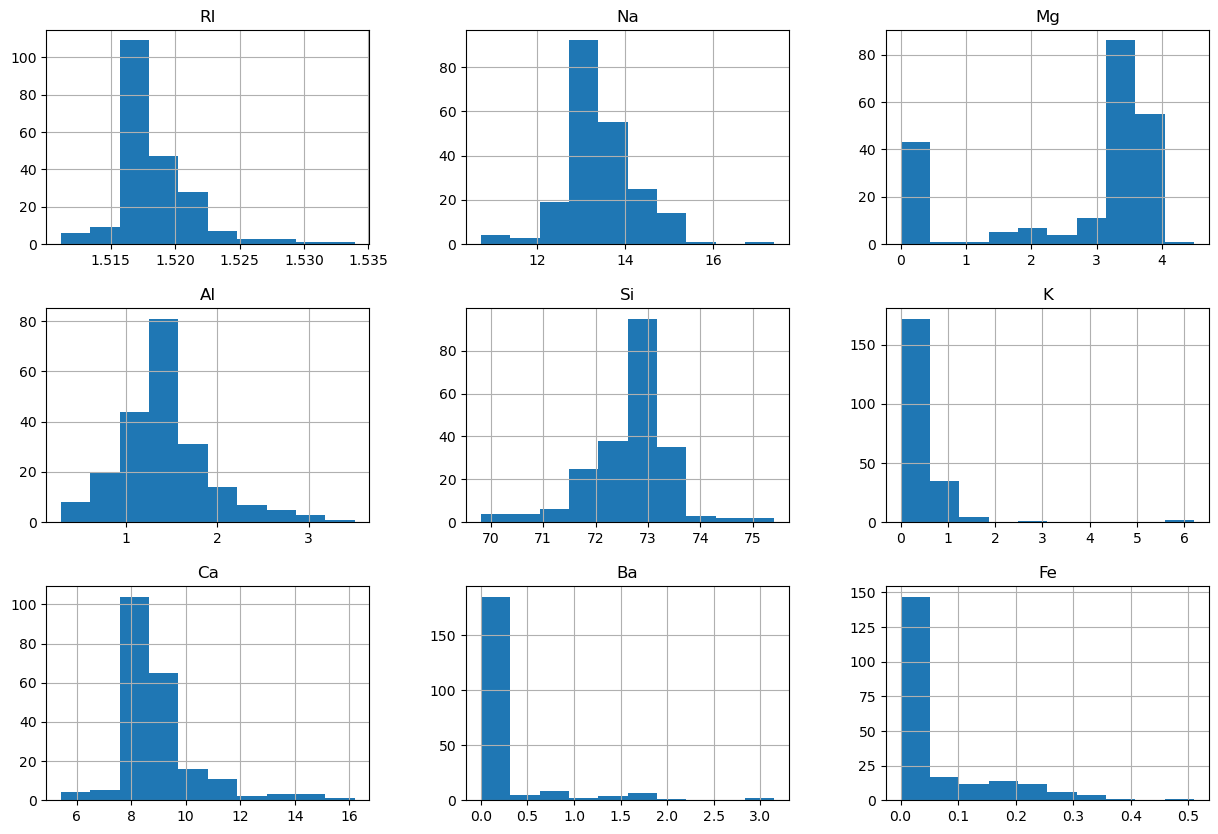

In [353]:
df1.drop('Type', axis=1).hist(figsize=(15,10))
plt.show()

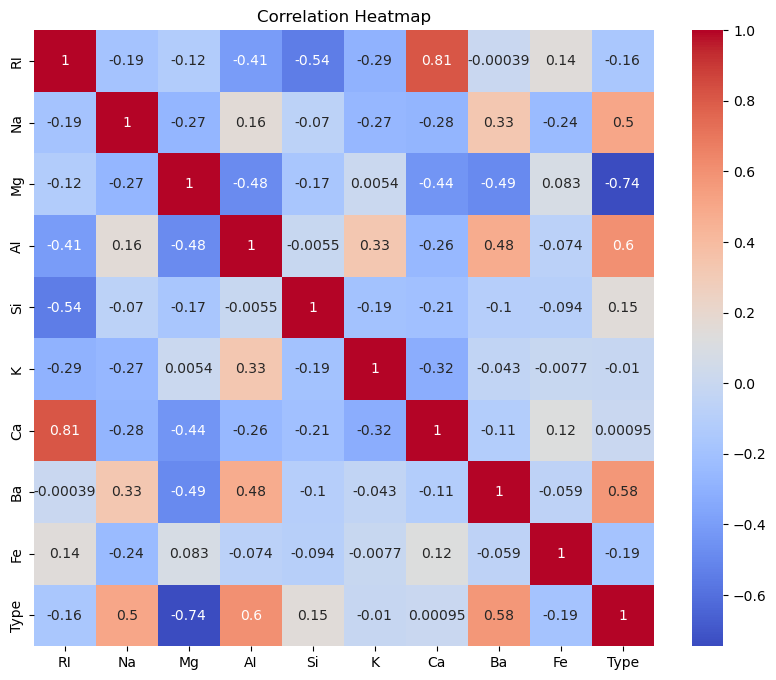

In [354]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

3: Data Preprocessing

1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.
2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

In [356]:
X = df1.drop('Type', axis=1)
y = df1['Type']

In [358]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [359]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

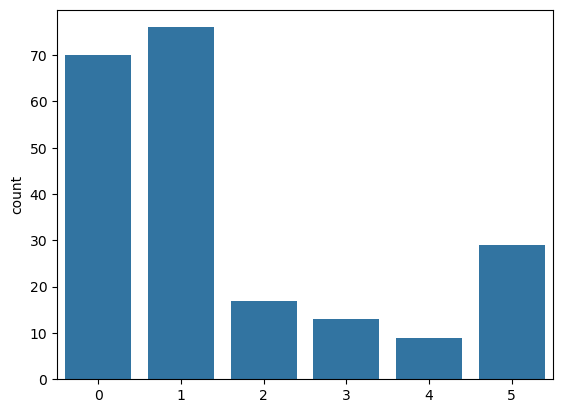

In [360]:
sns.countplot(x=y)
plt.show()

#### 4: Random Forest Model Implementation
1. Divide the data into train and test split.
2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.


In [362]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((171, 9), (43, 9), (171,), (43,))

In [363]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [365]:
y_pred = rf.predict(X_test)
y_pred 

array([5, 3, 1, 3, 0, 1, 1, 3, 0, 0, 2, 0, 5, 4, 0, 5, 5, 0, 0, 3, 1, 0,
       5, 1, 0, 0, 1, 4, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 2, 0, 1, 4])

In [366]:
accuracy_score(y_test, y_pred)

0.7441860465116279

In [367]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.69      0.79      0.73        14\n           1       0.77      0.67      0.71        15\n           2       0.50      0.33      0.40         3\n           3       0.75      1.00      0.86         3\n           4       0.67      1.00      0.80         2\n           5       1.00      0.83      0.91         6\n\n    accuracy                           0.74        43\n   macro avg       0.73      0.77      0.74        43\nweighted avg       0.75      0.74      0.74        43\n'

In [368]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  2,  1,  0,  0,  0],
       [ 3, 10,  0,  1,  1,  0],
       [ 2,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  2,  0],
       [ 0,  1,  0,  0,  0,  5]])

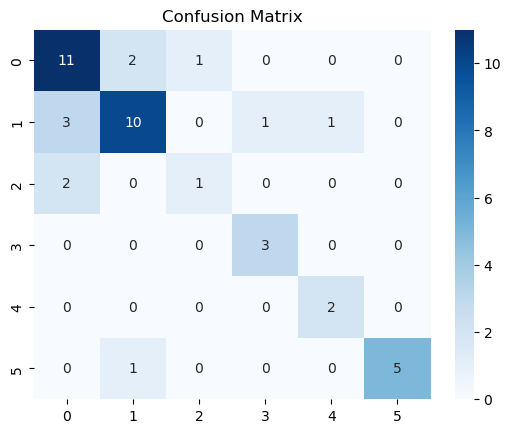

In [369]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#### 5: Bagging and Boosting Methods
Apply the Bagging and Boosting methods and compare the results.

In [377]:
bag = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=10, random_state=42)
bag.fit(X_train, y_train)
y_bag = bag.predict(X_test)
y_bag

array([5, 3, 1, 3, 0, 1, 1, 1, 0, 0, 2, 0, 5, 4, 0, 5, 5, 0, 0, 1, 1, 0,
       5, 1, 0, 2, 1, 4, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 4])

In [378]:
accuracy_score(y_test, y_bag)

0.7906976744186046

In [375]:
boost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
boost.fit(X_train, y_train)
y_boost = boost.predict(X_test)
y_boost

array([5, 3, 1, 3, 0, 1, 1, 1, 0, 1, 2, 0, 5, 4, 1, 5, 5, 0, 0, 1, 0, 0,
       5, 1, 1, 2, 1, 4, 1, 0, 5, 0, 0, 1, 1, 1, 0, 0, 1, 2, 5, 1, 4])

In [374]:
accuracy_score(y_test, y_boost)

0.813953488372093